
I'm trying to get murders per 100,000 inhabitants per US state per race. I need this because I need two populations to compare. I have UNODC murder rates for the US as a whole, African–Americans as percentage of total population (1790–2010) by U.S. state, White American population as of 2000 and 2010 censuses, and a year common to each of these tables. How do I get the rate per race per state from that?

If you are curious about the choice of subject matter, I'm trying to disprove things with simple statistics - generally, Nazi pseudoscience about genetics and race and Marxist pseudoscience about the malleability of human nature. In this case, it's the idea that homicide rate correlates with the continent your ancestors evolved on. It's mostly a disappointing exercise trying to simplify something that is complex, but I'm merely trying to show that simple, ideologically-motivated ideas don't hold up. And these exercises that I am giving myself are good practice.

In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

# https://www.kaggle.com/jyzaguirre/us-homicide-reports/version/2
homicides_df = load_csv('U.S._Homicide_Reports,_1980-2014_Homicides_between_1980_and_2014')

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 
load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 save_dataframes	 store_objects	 
sys	 


C:\Users\dev\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [2]:

homicides_df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [3]:

len(homicides_df['State'].unique())

51

In [4]:

homicides_df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014], dtype=int64)

In [5]:

match_series = (homicides_df['Year'] == 1980) & (homicides_df['State'] == 'Alabama')
homicides_df[match_series]['City'].unique()

array(['Jefferson', 'Mobile', 'Montgomery', 'Autauga', 'Baldwin',
       'Barbour', 'Blount', 'Bullock', 'Butler', 'Calhoun', 'Chambers',
       'Chilton', 'Choctaw', 'Clarke', 'Cleburne', 'Coffee', 'Colbert',
       'Conecuh', 'Coosa', 'Covington', 'Crenshaw', 'Cullman', 'Dale',
       'Dallas', 'De Kalb', 'Elmore', 'Escambia', 'Etowah', 'Fayette',
       'Franklin', 'Geneva', 'Greene', 'Houston', 'Jackson', 'Lamar',
       'Lauderdale', 'Lawrence', 'Lee', 'Limestone', 'Lowndes', 'Macon',
       'Madison', 'Marengo', 'Marion', 'Marshall', 'Morgan', 'Perry',
       'Pickens', 'Pike', 'Russell', 'St. Clair', 'Shelby', 'Sumter',
       'Talladega', 'Tallapoosa', 'Tuscaloosa', 'Walker', 'Washington',
       'Wilcox', 'Winston'], dtype=object)

In [17]:

homicides_df.sample(5).T

,110482,135799,140838,153599,131229
Record ID,110483,135800,140839,153600,131230
Agency Code,MA01301,OHCLP00,WI04116,NY03030,MI82349
Agency Name,Boston,Cleveland,West Allis,New York,Detroit
Agency Type,Municipal Police,Municipal Police,Municipal Police,Municipal Police,Municipal Police
City,Suffolk,Cuyahoga,Milwaukee,New York,Wayne
State,Massachusetts,Ohio,Wisconsin,New York,Michigan
Year,1985,1986,1986,1987,1986
Month,August,December,July,July,June
Incident,5,7,1,75,47
Crime Type,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter,Murder or Manslaughter


In [18]:

homicides_df['Crime Type'].unique()

array(['Murder or Manslaughter', 'Manslaughter by Negligence'],
      dtype=object)

In [19]:

column_list = ['State', 'Year', 'Perpetrator Race']
homicides_df[column_list].sample(5)

,State,Year,Perpetrator Race
581348,California,2011,White
142651,California,1987,Unknown
257656,New York,1992,Unknown
165826,Illinois,1988,Black
520416,Florida,2007,Black


In [20]:

homicides_df['Perpetrator Race'].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [21]:

wiki_url = 'https://en.wikipedia.org/wiki/'
year_set = set()
for year in homicides_df['Year'].unique():
    try:
        tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
        tables_df_list = pd.read_html(tables_url)
        year_set.add(year)
    except Exception as e:
        print('{}: {}'.format(year, e))
print(year_set)

1981: HTTP Error 404: Not Found
1982: HTTP Error 404: Not Found
1983: HTTP Error 404: Not Found
1984: HTTP Error 404: Not Found
1985: HTTP Error 404: Not Found
1986: HTTP Error 404: Not Found
1987: HTTP Error 404: Not Found
1988: HTTP Error 404: Not Found
1989: HTTP Error 404: Not Found
1991: HTTP Error 404: Not Found
1992: HTTP Error 404: Not Found
1993: HTTP Error 404: Not Found
1994: HTTP Error 404: Not Found
1995: HTTP Error 404: Not Found
1996: HTTP Error 404: Not Found
1997: HTTP Error 404: Not Found
1998: HTTP Error 404: Not Found
1999: HTTP Error 404: Not Found
2001: HTTP Error 404: Not Found
2002: HTTP Error 404: Not Found
2003: HTTP Error 404: Not Found
2004: HTTP Error 404: Not Found
2005: HTTP Error 404: Not Found
2006: HTTP Error 404: Not Found
2007: HTTP Error 404: Not Found
2008: HTTP Error 404: Not Found
2009: HTTP Error 404: Not Found
2011: HTTP Error 404: Not Found
2012: HTTP Error 404: Not Found
2013: HTTP Error 404: Not Found
2014: HTTP Error 404: Not Found
{2000, 2

In [22]:

max_year = max(year_set)

In [38]:

# Murders per 100,000 inhabitants
# https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/tables/10tbl01.xls
population_2010 = 308745538
murder_rate_2010 = 4.8
murder_count_2010 = 14748
match_series = (homicides_df['Year'] == max_year)
homicides_series = homicides_df[match_series]
homicides_groupby = homicides_series.groupby(by='Perpetrator Race')
columns_list = ['Victim Count', 'Perpetrator Count']
victim_count_df = homicides_groupby.sum()[columns_list]
victim_count_df['Murder Rate'] = victim_count_df['Victim Count'].map(lambda x: x*100000/population_2010)
print(victim_count_df['Victim Count'].sum()*100000/population_2010)
print(victim_count_df['Murder Rate'].mean())
format_str = '2010 Murder Count = {:,.0f} (actual {:,.0f}, summed {:,.0f}) = {}*{:,.0f}/100K'
print(format_str.format(murder_rate_2010*population_2010/100000, murder_count_2010, victim_count_df['Victim Count'].sum(),
                        murder_rate_2010, population_2010))
format_str = '2010 Murder Rate = {:.1f} (actual {:,.1f}) = {:,.0f}*100K/{:,.0f}'
print(format_str.format(murder_count_2010*100000/population_2010, murder_rate_2010, murder_count_2010, population_2010))
victim_count_df

0.6620338590933742
0.13240677181867483
2010 Murder Count = 14,820 (actual 14,748, summed 2,044) = 4.8*308,745,538/100K
2010 Murder Rate = 4.8 (actual 4.8) = 14,748*100K/308,745,538


,Victim Count,Perpetrator Count,Murder Rate
Perpetrator Race,,,
Asian/Pacific Islander,54,59,0.017490
Black,681,1977,0.220570
Native American/Alaska Native,22,21,0.007126
Unknown,470,206,0.152229
White,817,1455,0.264619


In [142]:

# Get the total victims per race per state for our year
from pandas.core.indexes.frozen import FrozenList

column_list = ['State', 'Perpetrator Race']
match_series = (homicides_df['Year'] == max_year)
homicides_max_year_groupby = homicides_df[match_series].groupby(by=column_list)
homicides_max_year_df = homicides_max_year_groupby['Victim Count'].sum()
homicides_max_year_df.index.names = FrozenList(['State', 'Race'])
homicides_max_year_df.index.names

FrozenList(['State', 'Race'])

In [143]:

homicides_max_year_df = homicides_max_year_df.reset_index()
homicides_max_year_df.sample(5)

,State,Race,Victim Count
39,Florida,White,77
111,New Jersey,White,12
144,Rhodes Island,Black,0
104,Nevada,White,8
29,Delaware,Black,0


In [15]:

wiki_url = 'https://en.wikipedia.org/wiki/'
tables_url = '{}List_of_U.S._states_by_homicide_rate'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)

In [26]:

rate_by_state_df = tables_df_list[0].dropna(axis=0, how='all').dropna(axis=1, how='all')
rate_by_state_df = rate_by_state_df.set_index('State')
rate_by_state_df.columns = rate_by_state_df.columns.map(lambda x: int(x))
rate_by_state_df.head(5).T.head(5).T

,2017,2014,2010,2005,2000
State,,,,,
Alabama,8.3,5.7,5.7,8.2,7.4
Alaska,8.4,5.6,4.3,4.8,4.3
Arizona,5.9,4.7,6.4,7.5,7.0
Arkansas,8.6,5.6,4.6,6.7,6.3
California,4.6,4.4,4.8,6.9,6.1


In [138]:

us_pop_df = pd.DataFrame([])
year = 1980
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)
    print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df = pop_df.set_index('State')
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))
us_pop_df.head(5).T.head(8).T

[(1, (51, 3)), (2, (100, 5))]


,Rank_1980,Population_1980
State,,
California,1,23667902
New York,2,17558072
Texas,3,14229191
Pennsylvania,4,11863895
Illinois,5,11426518


In [139]:

year = 1990
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)
    print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df = pop_df.set_index('State')
    
    column_list = [0, 3]
    pop_df = pop_df.T.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))
us_pop_df.head(5).T.head(8).T

[(1, (52, 6)), (4, (100, 5))]


,Rank_1980,Population_1980,Rank_1990,Population_1990
State,,,,
Alabama,22,3.89389e+06,22,146699
Alaska,50,401851,49,148192
Arizona,29,2.71822e+06,24,947013
Arkansas,33,2.28644e+06,33,64290
California,1,2.36679e+07,1,6092119


In [140]:

year = 2000
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)
    print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

    pop_df = tables_df_list[1].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df = pop_df.set_index('State')
    
    column_list = [0, 2]
    pop_df = pop_df.T.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))
us_pop_df.head(5).T.head(8).T

[(1, (52, 6)), (2, (100, 5))]


,Rank_1980,Population_1980,Rank_1990,Population_1990,Rank_2000,Population_2000
State,,,,,,
Alabama,22,3.89389e+06,22,146699,23,4447100
Alaska,50,401851,49,148192,48,626932
Arizona,29,2.71822e+06,24,947013,20,5130632
Arkansas,33,2.28644e+06,33,64290,33,2673400
California,1,2.36679e+07,1,6092119,1,33871648


In [141]:

year = 2010
try:
    tables_url = '{}{}_United_States_Census'.format(wiki_url, year)
    tables_df_list = pd.read_html(tables_url)
    print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

    pop_df = tables_df_list[2].dropna(axis=0, how='all').dropna(axis=1, how='all')
    pop_df = pop_df.set_index('State')
    
    column_list = [0, 2]
    pop_df = pop_df.T.iloc[column_list].T
    pop_df.columns = ['Rank_{}'.format(year), 'Population_{}'.format(year)]
    
    us_pop_df = pd.merge(left=us_pop_df, right=pop_df, how='outer',
                         left_index=True, right_index=True)
except Exception as e:
    print('{}: {}'.format(year, e))
us_pop_df.head(5).T.head(8).T

[(2, (52, 6)), (4, (100, 7))]


,Rank_1980,Population_1980,Rank_1990,Population_1990,Rank_2000,Population_2000,Rank_2010,Population_2010
State,,,,,,,,
Alabama,22,3.89389e+06,22,146699,23,4447100,23,4779736
Alaska,50,401851,49,148192,48,626932,47,710231
Arizona,29,2.71822e+06,24,947013,20,5130632,16,6392017
Arkansas,33,2.28644e+06,33,64290,33,2673400,32,2915918
California,1,2.36679e+07,1,6092119,1,33871648,1,37253956


In [113]:

pop_df.head()

,Rank_2010,Population_2010
State,,
California,1,37253956
Texas,2,25145561
New York,3,19378102
Florida,4,18801310
Illinois,5,12830632


In [114]:

tables_df_list[2].dropna(axis=0, how='all').dropna(axis=1, how='all').head()

,Rank,State,Population as of2000 Census,Population as of2010 Census[51],Change,Percentchange
0,1,California,33871648,37253956,3382308,10.0%
1,2,Texas,20851820,25145561,4293741,20.6%
2,3,New York,18976457,19378102,401645,2.1%
3,4,Florida,15982378,18801310,2818932,17.6%
4,5,Illinois,12419293,12830632,411339,3.3%


In [119]:

us_pop_df = us_pop_df.dropna()
us_pop_df.sample(5).T

State,Minnesota,Hawaii,Missouri,Kentucky,New York
Rank_1980,21,39,15,23,2
Population_1980,4.07597e+06,964691,4.91669e+06,3.66078e+06,1.75581e+07
Rank_1990,20,41,15,23,2
Population_1990,299129,143538,200387,24519,432383
Rank_2000,21,42,17,25,3
Population_2000,4919479,1211537,5595211,4041769,18976457
Rank_2010,21,40,18,26,3
Population_2010,5303925,1360301,5988927,4339367,19378102


In [120]:

dtype_df = get_column_descriptions(us_pop_df)
match_series = (dtype_df['only_integers'] == True)

In [121]:

for column_name in dtype_df[match_series]['column_name']:
    us_pop_df[column_name] = us_pop_df[column_name].map(lambda x: int(x))

In [122]:

def f(x):
    
    return float(x[:-1])/100

In [123]:

tables_url = '{}Historical_racial_and_ethnic_demographics_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(27, (57, 24)), (28, (56, 9)), (29, (57, 12)), (30, (53, 17)), (33, (83, 9))]


In [126]:

# African–Americans as percentage of total population (1790–2010) by U.S. state
black_pop_df = tables_df_list[27]
black_pop_df = black_pop_df.set_index('State/territory')
black_pop_df.columns = [1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970,
                        1980, 1990, 2000, 2010]
black_pop_df.head(5).T.head(5).T

,1790,1800,1810,1820,1830
State/territory,,,,,
United States,19.3%,18.9%,19.0%,18.4%,18.1%
Northeast,3.4%,3.2%,2.9%,2.5%,2.3%
Midwest,NaN,1.2%,2.4%,2.1%,2.6%
South,35.2%,35.0%,36.7%,37.2%,37.9%
West,NaN,NaN,NaN,NaN,NaN


In [127]:

blacks_max_year_df = black_pop_df[max_year].reset_index()
blacks_max_year_df.columns = ['State', 'Percent']
blacks_max_year_df['Race'] = 'Black'
column_list = ['State', 'Race']
blacks_max_year_groupby = blacks_max_year_df.groupby(by=column_list)
blacks_max_year_df = blacks_max_year_groupby['Percent'].max().map(f).reset_index()
blacks_max_year_df.sample(5).T.head(5).T

,State,Race,Percent
40,Pennsylvania,Black,0.108
16,Kansas,Black,0.059
50,Vermont,Black,0.01
45,South Dakota,Black,0.013
22,Michigan,Black,0.142


In [128]:

tables_url = '{}White_Americans'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(2, (52, 6)), (3, (52, 7)), (4, (52, 7))]


In [129]:

# White American population as of 2000 and 2010 censuses
white_pop_df = tables_df_list[2]
white_pop_df = white_pop_df.set_index('State')
white_pop_df.columns = ['Population_2000', 'Percent_2000', 'Population_2010',
                        'Percent_2010', 'Percent_Growth']
white_pop_df.head(5).T.head(5).T

,Population_2000,Percent_2000,Population_2010,Percent_2010,Percent_Growth
State,,,,,
Alabama,3162808,71.1%,3275394,68.5%,+3.6%
Alaska,434534,69.3%,473576,66.7%,+9.0%
Arizona,3873611,75.5%,4667121,73.0%,+20.5%
Arkansas,2138598,80.0%,2245229,77.0%,+5.0%
California,20170059,79.7%,21453934,74.0%,+6.4%


In [130]:

whites_max_year_df = white_pop_df['Percent_{}'.format(max_year)].reset_index()
whites_max_year_df.columns = ['State', 'Percent']
whites_max_year_df['Race'] = 'White'
column_list = ['State', 'Race']
whites_max_year_groupby = whites_max_year_df.groupby(by=column_list)
whites_max_year_df = whites_max_year_groupby['Percent'].max().map(f).reset_index()
whites_max_year_df.head(5).T.head(5).T

,State,Race,Percent
0,Alabama,White,0.685
1,Alaska,White,0.667
2,Arizona,White,0.73
3,Arkansas,White,0.77
4,California,White,0.74


In [131]:

column_list = ['State', 'Race', 'Percent']
percents_df = pd.merge(left=whites_max_year_df, right=blacks_max_year_df, how='outer',
                       on=column_list).sort_values(column_list).reset_index(drop=True)
percents_df.head(5).T.head(5).T

,State,Race,Percent
0,Alabama,Black,0.262
1,Alabama,White,0.685
2,Alaska,Black,0.033
3,Alaska,White,0.667
4,Arizona,Black,0.041


In [144]:

column_list = ['State', 'Race']
homicides_max_year_df = pd.merge(left=homicides_max_year_df, right=percents_df, how='outer',
                                 on=column_list).sort_values(column_list).reset_index(drop=True)
homicides_max_year_df.head(5).T.head(5).T

,State,Race,Victim Count,Percent
0,Alabama,Black,20,0.262
1,Alabama,Native American/Alaska Native,0,NaN
2,Alabama,Unknown,0,NaN
3,Alabama,White,0,0.685
4,Alaska,Asian/Pacific Islander,6,NaN



We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [133]:

tables_df_list = pd.read_html('../data/html/intentional_homicide_victims_per_100K_inhabitants.html')
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(0, (231, 7))]


In [134]:

# UNODC intentional homicide victims: intentional homicide victims per 100,000 inhabitants
country_pop_df = tables_df_list[0]
country_pop_df = country_pop_df.set_index('Country (or dependent territory, subnational area, etc.)')
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))
country_pop_df.head(5).T.head(5).T

,Region,Subregion,Rate,Count,Year
Country,,,,,
Bolivia,Americas,South America,6.3,686,2016
Paraguay,Americas,South America,9.29,617,2015
Bosnia and Herzegovina,Europe,Southern Europe,1.2,42,2017
Central Iraq,Asia,Western Asia,10.08,3029,2014
Palestine,Asia,Western Asia,0.69,33,2016


In [135]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates_list = country_pop_df[match_series]['Rate'].dropna().tolist()

In [136]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates_list = country_pop_df[match_series]['Rate'].dropna().tolist()

In [160]:

import numpy as np

pop_dict = us_pop_df['Population_{}'.format(max_year)].to_dict()

def f(row_series):
    state = row_series['State']
    count = row_series['Victim Count']
    if state in pop_dict:
        population = pop_dict[state]
        rate = (100000/population)*count
    else:
        rate = np.nan
    
    return rate

homicides_max_year_df['Rate'] = homicides_max_year_df.apply(f, axis=1)
homicides_max_year_df.head(5)

,State,Race,Victim Count,Percent,Rate
0,Alabama,Black,20.0,0.262,0.418433
1,Alabama,Native American/Alaska Native,0.0,NaN,0.000000
2,Alabama,Unknown,0.0,NaN,0.000000
3,Alabama,White,0.0,0.685,0.000000
4,Alaska,Asian/Pacific Islander,6.0,NaN,0.844796


In [161]:

match_series = (homicides_max_year_df['Race'] == 'Black')
black_homicide_rates_list = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [162]:

match_series = (homicides_max_year_df['Race'] == 'White')
white_homicide_rates_list = homicides_max_year_df[match_series]['Rate'].dropna().tolist()

In [163]:

match_series = (homicides_max_year_df['Race'] == 'Black')
mean_black_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (homicides_max_year_df['Race'] == 'White')
mean_white_homicide_rate = homicides_max_year_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Region'] == 'Europe')
mean_european_homicide_rate = country_pop_df[match_series]['Rate'].mean()
match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
mean_african_homicide_rate = country_pop_df[match_series]['Rate'].mean()
print_str = '''
Mean African Homicide Rate: {}
Mean Black Homicide Rate: {}
Mean European Homicide Rate: {}
Mean White Homicide Rate: {}'''
print(print_str.format(mean_african_homicide_rate, mean_black_homicide_rate,
                       mean_european_homicide_rate, mean_white_homicide_rate))


Mean African Homicide Rate: 8.23843137254902
Mean Black Homicide Rate: 0.2606705226302728
Mean European Homicide Rate: 1.5127450980392159
Mean White Homicide Rate: 0.2440347538773676


In [164]:

match_series = (homicides_df['Perpetrator Race'] == 'Black') & (homicides_df['Year'] == max_year)
victim_count = homicides_df[match_series]['Victim Count'].sum()
pop_count = us_pop_df['Population_{}'.format(max_year)].sum()
victim_count*100000/pop_count

0.11028499462881307

In [165]:

match_series = (homicides_max_year_df['Race'] == 'Black')
homicides_max_year_df[match_series]['Victim Count'].sum()

681.0

In [166]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

test_race = 'US White'
us_white_data = np.array(white_homicide_rates_list).reshape((-1, 1))
global_european_data = np.array(european_homicide_rates_list).reshape((-1, 1))
global_african_data = np.array(african_homicide_rates_list).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_white_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

test_race = 'US Black'
us_black_data = np.array(black_homicide_rates_list).reshape((-1, 1))

country_str = 'European countries'
test_populations(global_european_data, us_black_data, country_str, test_race)
country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

Here are the country groups tested against the murder rate data you agreed to:

European countries vs US White: t=5.36; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the European countries population.

African countries vs US White: t=7.38; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the African countries population.

European countries vs US Black: t=4.87; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the European countries population.

African countries vs US Black: t=6.90; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the African countries population.



In [167]:

import matplotlib.pyplot as plt
%matplotlib inline

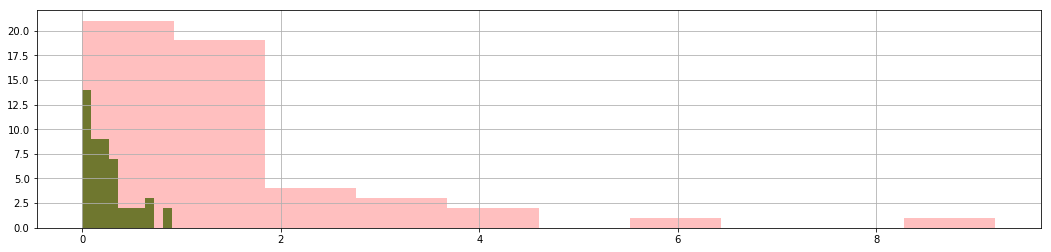

In [168]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                     color='red')

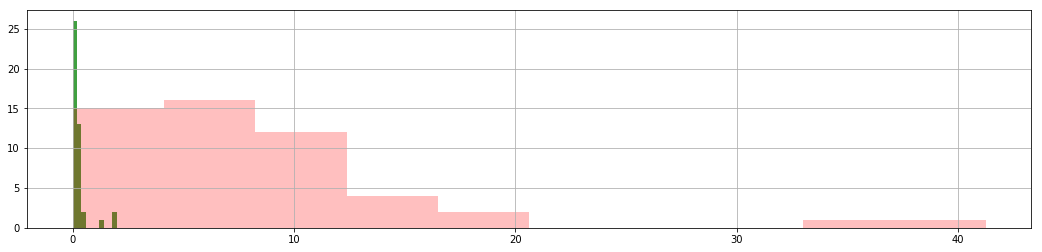

In [169]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                   color='red')

In [172]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [171]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))

NameError: name 'notebook_path' is not defined